In [2]:
import yfinance as yf
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
#import randomness

In [3]:
x=np.arange(0,50,0.01)
y=np.sin(x)
y2=np.cos(x)-x

Text(0.5, 1.0, 'sine wave')

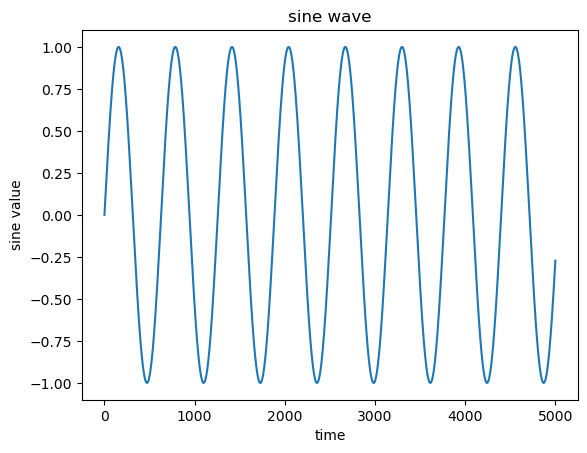

In [4]:
plt.plot(y)
plt.xlabel('time')
plt.ylabel('sine value')
plt.title('sine wave')

Text(0.5, 1.0, 'cosine wave')

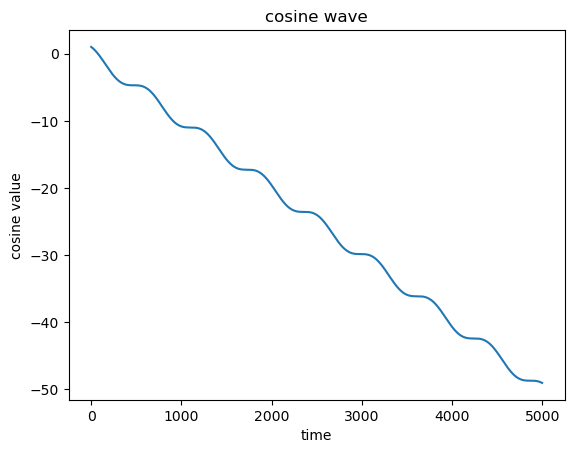

In [5]:
plt.plot(y2)
plt.xlabel('time')
plt.ylabel('cosine value')
plt.title('cosine wave')

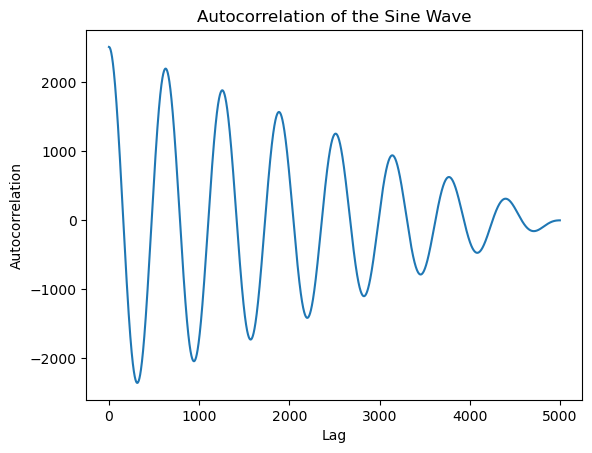

In [6]:
# get autocorrelation of the sine wave 
y=np.sin(x)

autocorr_sine = np.correlate(y, y, mode='full')
autocorr_sine = autocorr_sine[autocorr_sine.size // 2:]
plt.plot(autocorr_sine)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the Sine Wave')
plt.show()



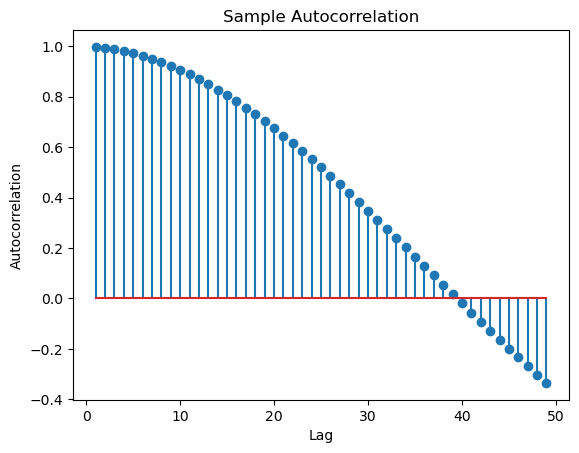

In [13]:
# Return series - sine wave
T = 500
r_t = np.sin(np.linspace(0, 20, T))

# Sample mean
r_mean = np.mean(r_t)

# Lag-l sample autocorrelation (for multiple lags)
def sample_autocorrelation(r_t, lag):
    T = len(r_t)
    r_mean = np.mean(r_t)
    numerator = np.sum((r_t[lag:] - r_mean) * (r_t[:-lag] - r_mean))
    denominator = np.sum((r_t - r_mean) ** 2)
    return numerator / denominator

# Compute and plot autocorrelations for multiple lags
lags = np.arange(1, 50)  #set the range of lags
autocorrs = [sample_autocorrelation(r_t, lag) for lag in lags]

plt.stem(lags, autocorrs)  # remove use_line_collection 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Sample Autocorrelation')
plt.show()



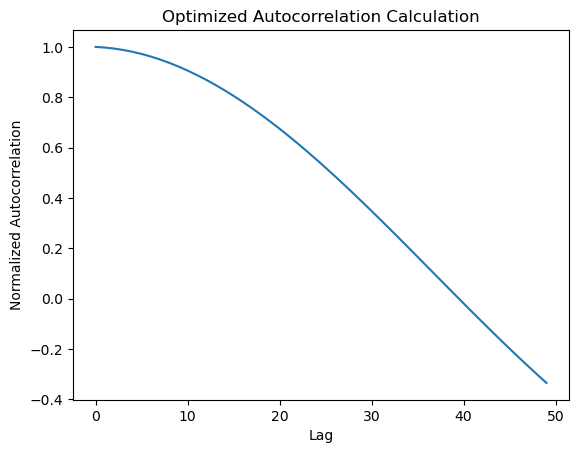

In [14]:
# Generate sample data (sine wave example)
T = 500
r_t = np.sin(np.linspace(0, 20, T))

# Center the data by subtracting the mean
r_t_centered = r_t - np.mean(r_t)

# Compute full autocorrelation using np.correlate
autocorr_full = np.correlate(r_t_centered, r_t_centered, mode='full')

# Select only positive lags
autocorr = autocorr_full[autocorr_full.size // 2:]

# Normalize by dividing by the zero-lag autocorrelation
autocorr /= autocorr[0]

# Plot the autocorrelation for a limited number of lags
plt.plot(autocorr[:50])  # Display up to 50 lags
plt.xlabel('Lag')
plt.ylabel('Normalized Autocorrelation')
plt.title('Optimized Autocorrelation Calculation')
plt.show()




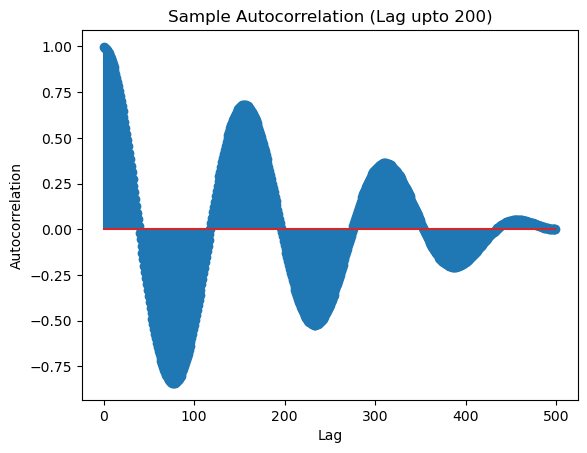

In [15]:
# Return series (예시로 sine wave 사용)
T = 500
r_t = np.sin(np.linspace(0, 20, T))

# Lag-l sample autocorrelation (for multiple lags)
def sample_autocorrelation(r_t, lag):
    T = len(r_t)
    r_mean = np.mean(r_t)
    numerator = np.sum((r_t[lag:] - r_mean) * (r_t[:-lag] - r_mean))
    denominator = np.sum((r_t - r_mean) ** 2)
    return numerator / denominator

# Compute and plot autocorrelations for multiple lags (1부터 200까지)
lags = np.arange(1, 500)  # 200까지의 랙 설정
autocorrs = [sample_autocorrelation(r_t, lag) for lag in lags]

plt.stem(lags, autocorrs)  # use_line_collection 제거
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Sample Autocorrelation (Lag upto 200)')
plt.show()


In [12]:
#compare autorrelation between sign function and ibm stock
#ibm stock is highly fluctuation 


GetIBMInformation = yahooFinance.Ticker("IBM")

In [13]:
#compare autorrelation between sign function and ibm stock 
#ibm stock is highly fluctuation 

IBMStock = GetIBMInformation.history(period="1y")
IBMStockClose = IBMStock['Close']
IBMStockClose = IBMStockClose.values


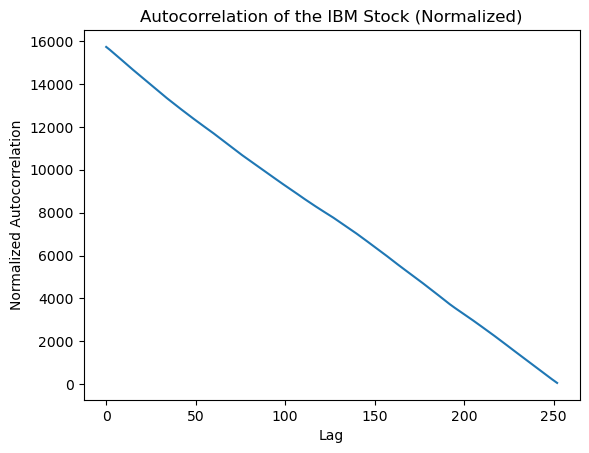

In [25]:
# load ibm stock data
GetIBMInformation = yf.Ticker("IBM")
IBMStock = GetIBMInformation.history(period="1y")  #load 1 year data


# close price data
IBMStockClose = IBMStock['Close'].values

# Autocorrelation calculation
autocorr_IBM = np.correlate(IBMStockClose, IBMStockClose, mode='full')
autocorr_IBM = autocorr_IBM[autocorr_IBM.size // 2:]  # use positive lags only

# regularize the autocorrelation
autocorr_IBM = autocorr_IBM / np.var(IBMStockClose)

# plot the graph
plt.plot(autocorr_IBM)
plt.xlabel('Lag')
plt.ylabel('Normalized Autocorrelation')
plt.title('Autocorrelation of the IBM Stock (Normalized)')
plt.show()